In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_pickle('./data/cleaned.pickle')
X = df.drop(columns='class')
y = df['class']

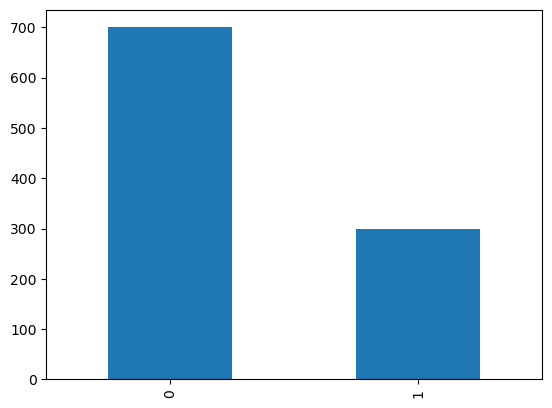

In [17]:
# Label data is unbalanced -> using stratified kfold
y.value_counts().plot(kind='bar')
plt.show()

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [19]:
sc_X = StandardScaler()
sc_X.fit(X)
X_scaled = sc_X.transform(X)

In [20]:
kf = StratifiedKFold(n_splits=10, shuffle=False)

In [21]:
model = LogisticRegression(max_iter=1000)
accuracy = []
# model = DecisionTreeClassifier()
for train, test in kf.split(X_scaled, y):
    model.fit(X_scaled[train], y.iloc[train])
    pred = model.predict(X_scaled[test])
    acc = accuracy_score(pred, y.iloc[test])
    print('log_loss:', log_loss(pred, y.iloc[test]))
    print('accuracy:', acc)
    accuracy.append(acc)
mean_accuracy = np.mean(accuracy)
print(mean_accuracy)

log_loss: 6.487857610041086
accuracy: 0.82
log_loss: 10.813096016735146
accuracy: 0.7
log_loss: 9.37134988117046
accuracy: 0.74
log_loss: 7.569167211714602
accuracy: 0.79
log_loss: 9.010913347279287
accuracy: 0.75
log_loss: 7.20873067782343
accuracy: 0.8
log_loss: 12.254842152299835
accuracy: 0.66
log_loss: 6.848294143932259
accuracy: 0.81
log_loss: 8.290040279496944
accuracy: 0.77
log_loss: 9.010913347279287
accuracy: 0.75
0.759
